In [ ]:
#Import Libraries
import math
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import pandas_datareader as pdr
import datetime as dt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
df = pd.read_csv('RILO.csv')
df['Date']= pd.to_datetime(df['Date'])
df = df.set_index(df['Date'])
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2016-01-01,RELIANCE,EQ,2016-01-01,1014.60,1009.80,1018.9,1008.20,1013.6,1015.35,1015.52,1238135,1.257353e+09,30701,529539,42.77
2016-01-04,RELIANCE,EQ,2016-01-04,1015.35,1005.00,1013.8,986.70,993.2,995.30,998.91,6896571,6.889070e+09,66235,4974602,72.13
2016-01-05,RELIANCE,EQ,2016-01-05,995.30,1000.30,1010.0,997.00,1005.0,1005.15,1003.41,3416459,3.428125e+09,59935,1987804,58.18
2016-01-06,RELIANCE,EQ,2016-01-06,1005.15,1007.60,1038.4,1000.40,1029.1,1032.20,1028.15,6116855,6.289073e+09,160947,2912662,47.62
2016-01-07,RELIANCE,EQ,2016-01-07,1032.20,1021.05,1028.0,1008.05,1018.9,1013.25,1016.73,4512219,4.587700e+09,105075,2474491,54.84


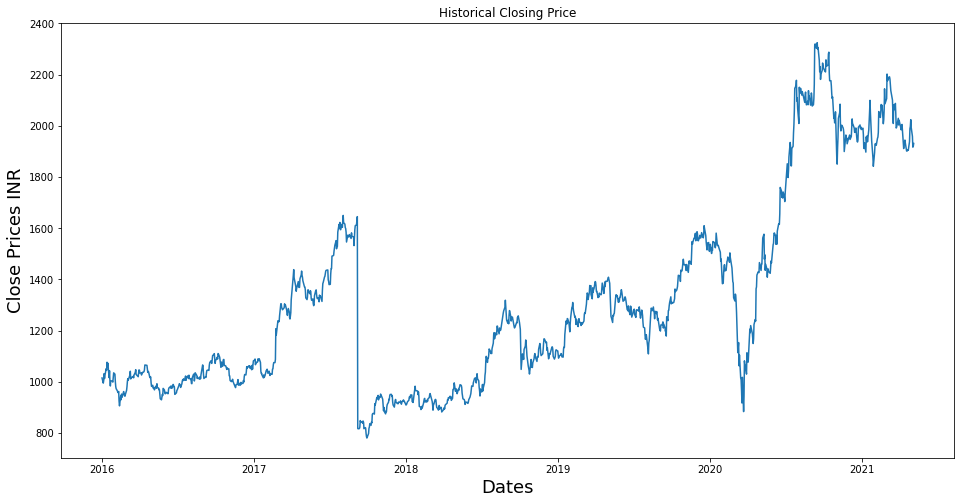

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close Price'])
plt.title('Historical Closing Price')
plt.xlabel('Dates', fontsize = 18)
plt.ylabel('Close Prices INR', fontsize = 18)
plt.show()

In [ ]:
#Extracting Closing Prices
df1 = df.filter(['Close Price'])
dataset = df1.values
training_data_len = math.ceil(len(dataset)* 0.8)

training_data_len

1060

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)

1324

In [ ]:
#Create training data set
#Scaled training dataset 
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <=60:
    print(x_train)
    print(y_train)
    print()

[array([0.15188028, 0.13889159, 0.14527257, 0.16279597, 0.15051987,
       0.15861756, 0.17536359, 0.17137952, 0.19172092, 0.18187413,
       0.18942118, 0.15285201, 0.17018106, 0.14488388, 0.13170084,
       0.14462475, 0.14449519, 0.14151524, 0.1528844 , 0.16486898,
       0.16156512, 0.14268131, 0.12988696, 0.1244777 , 0.1230849 ,
       0.11670392, 0.11440417, 0.11774042, 0.09305866, 0.08139799,
       0.10744016, 0.09694555, 0.11122988, 0.10313219, 0.1058854 ,
       0.11751369, 0.10931882, 0.11126227, 0.10572345, 0.10977229,
       0.12033168, 0.12982217, 0.14290804, 0.15026075, 0.14608234,
       0.15942733, 0.16895022, 0.14954815, 0.15132964, 0.15473067,
       0.15521653, 0.1560263 , 0.15230136, 0.15955689, 0.16609983,
       0.17293428, 0.16085252, 0.15515175, 0.16541962, 0.17241603])]
[0.17121756874939265]



In [ ]:
#Conver the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape Data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1000, 60, 1)

In [ ]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Train Model
model.fit(x_train, y_train, batch_size=1, epochs= 1)

1000/1000 [==============================] - 25s 22ms/step - loss: 0.0025


In [ ]:
#Create Testing Dataset 
#Create new Array containing Scaled value from 1000 to 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert Data to numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape Data
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get model's Predicted Price Values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

61.85595701603868

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


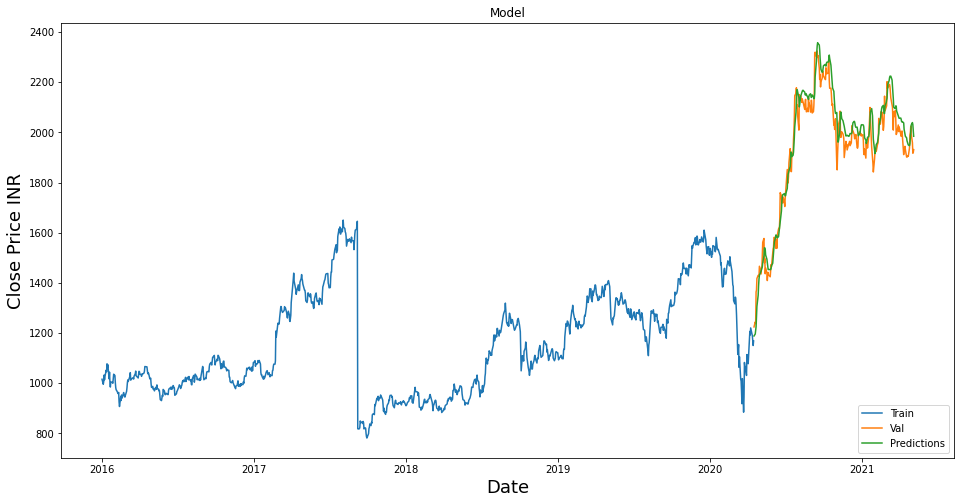

In [ ]:
#plotting the data
train = df1[:training_data_len]
valid = df1[training_data_len:]
valid['Predictions'] = predictions
#Visualizing Data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR', fontsize = 18)
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#Show the actual price and predicted prices 
valid

,Close Price,Predictions
Date,,
2020-04-17,1224.00,1187.870605
2020-04-20,1243.80,1195.708008
2020-04-21,1237.35,1211.199097
2020-04-22,1363.60,1224.959229
2020-04-23,1370.90,1264.025513
...,...,...
2021-04-30,1994.50,2028.773804
2021-05-03,1959.05,2038.999268
2021-05-04,1916.60,2030.950806
